# Extract mesh surface and plot on aerial background

save as geotiff file

In [4]:
import sys
sys.path.append('../src')

from resipy import Project
import numpy as np
import pyvista as pv

datadir = '../src/examples/'

In [7]:
k = Project(typ='R3t')
k.createSurvey(datadir + 'dc-3d/protocol.dat', ftype='ProtocolDC')
k.importElec(datadir + 'dc-3d/elec.csv')
k.createMesh()
k.invert()

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...fmd in gmshWrap.py: 16.343534
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Using legacy msh parser...
Reading mesh3d.msh
Msh file version == 2.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 7581 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 0.164347 Gb
done
Writing .in file and protocol.dat... done!

--------------------- MAIN INVERSION ------------------


 >> R 3 t     E R T    M o d e l    v 2.30 <<

 >> Date: 10-02-2021
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d  

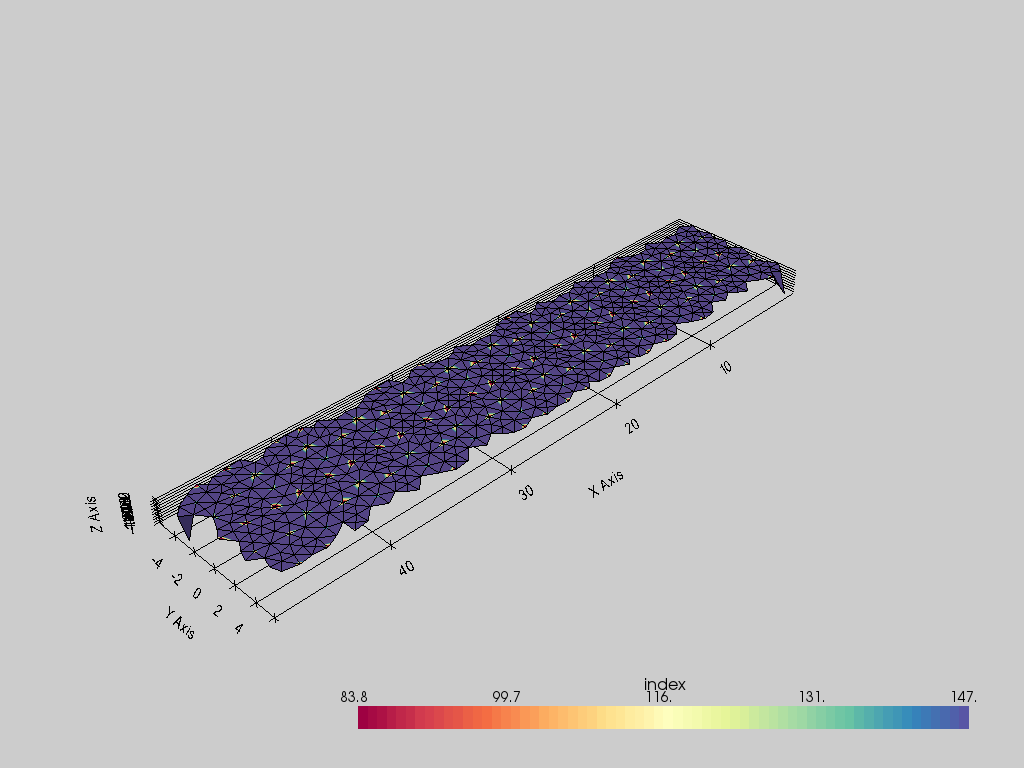

In [34]:
mesh = k.meshResults[0].extractSurface() # this test mesh.computeNeigh as well 
mesh.show3D(attr='Resistivity(ohm.m)')

In [32]:
mesh.df = mesh.df.reset_index(drop=True)

In [ ]:
# plot mesh with aerial background (needs to be a screenshot)
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

# load aerial photograph (AP)
rasterAP = rasterio.open(pdir + 'image/lancaster.tiff')
bndAP = rasterAP.bounds
extentAP = (bndAP.left, bndAP.right, bndAP.bottom, bndAP.top)

# load raster of interest
raster = rasterio.open()
bnd = raster.bounds
extent = (bnd.left, bnd.right, bnd.bottom, bnd.top)

fig, ax = plt.subplots(figsize=(5,5))
rasterio.plot.show(rasterAP.read(), extent=extentAP, ax=ax) # if rasterAP.read() then we have the 3 bands
rasterio.plot.show(raster.read(), extent=extent, ax=ax)
# fig.colorbar(ax.get_images()[1], ax=ax, label='ECa [mS/m]')
# ax.set_xlim([347230, 347320]) # for temple
# ax.set_ylim([462230, 462300])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
x, y, arrow_length = 0.95, 0.98, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='red', width=3, headwidth=10, edgecolor='none'),
            ha='center', va='center', fontsize=20, color='red',
            xycoords=ax.transAxes)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.annotate('- {:.2f} m'.format(d), xy=(0, 0.94), xycoords=ax.transAxes, color='white', fontsize=20)
ax.get_xaxis().get_major_formatter().set_useOffset(False) # avoid exponential notation on axis
ax.get_yaxis().get_major_formatter().set_useOffset(False) # avoid exponential notation on axis
plt.draw()
fig.tight_layout()